# Creating a Box-Behnken Design

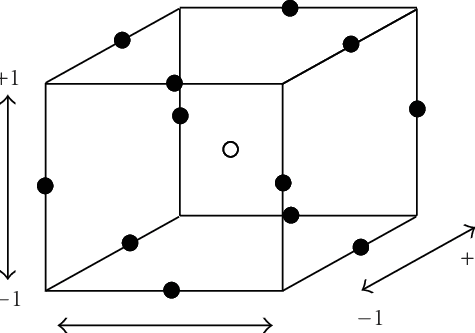

In [ ]:
# Let's install the packages we need 

# !pip install pyDOE3
# !pip install pandas
# !pip install numpy


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Bringing in our tools

from pyDOE3 import bbdesign
import pandas as pd
import numpy as np


## For a simple 3-factor BB design

bbdesign(n, center)

Where:
n = number of factors;
center = number of center points


In [3]:
# Let's plan our design

try:
    factors = int(input('Type the number of factors'))
    if factors < 3:
        print('Minimum 3 factors are required')
        factors = int(input('Type the number of factors'))
except ValueError:
    print('Invalid input, defaulting to 3')
    factors = 3

try:
    center_points = int(input('Type de number of center points'))
    if center_points < 3:
        print('Minimum 3 center points are required')
        center_points = int(input('Type de number of center points'))
except ValueError:
    print('Invalid input, defaulting to 3')
    center_points = 3

design = bbdesign(factors,center_points)
print (design)

[[-1. -1.  0.]
 [-1.  1.  0.]
 [ 1. -1.  0.]
 [ 1.  1.  0.]
 [-1.  0. -1.]
 [-1.  0.  1.]
 [ 1.  0. -1.]
 [ 1.  0.  1.]
 [ 0. -1. -1.]
 [ 0. -1.  1.]
 [ 0.  1. -1.]
 [ 0.  1.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [ ]:
# Labeling the factors

Factor_list =[]

for n in range(factors):
    name = input('Type the factor name')
    Factor_list.append(name)

print (Factor_list)

['Temp (ºC)', 'Time (min)', 'Solvent (%)']


In [7]:
# Creating de coded design
df =pd.DataFrame(design,columns=Factor_list)
print(df)


    Temp (ºC)  Time (min)  Solvent (%)
0        -1.0        -1.0          0.0
1        -1.0         1.0          0.0
2         1.0        -1.0          0.0
3         1.0         1.0          0.0
4        -1.0         0.0         -1.0
5        -1.0         0.0          1.0
6         1.0         0.0         -1.0
7         1.0         0.0          1.0
8         0.0        -1.0         -1.0
9         0.0        -1.0          1.0
10        0.0         1.0         -1.0
11        0.0         1.0          1.0
12        0.0         0.0          0.0
13        0.0         0.0          0.0
14        0.0         0.0          0.0


# Scale to actual experimental values

In [8]:
def exp_df(df, factor_ranges):
    '''Converts the coded values (-1, 0, 1) to real experimental settings
    Parameters:
    --------------------
    df: DataFrame
        Your coded design (-1, 0, 1 values)
    factor_ranges_ list of tuples
        Min and max values for each factor (min, max)
        
    Returns:
    --------------------
    scaled_design: DataFrame
        Your design with the experimental values to test in the lab'''
    
    # Working with a copy to keep the original DataFrame intact
    exp_design=df.copy()

    # Processing each factor
    for i, (low, high) in enumerate(factor_ranges):
        #Finding the midle point and the spread
        center = (high + low)/2
        range_val = high - low

        #Converting: -1 becomes low, 0 becomes center, 1 becomes high
        exp_design.iloc[:, i] = center + df.iloc[:, i] * range_val/2

    return exp_design


In [9]:
# Setting the experimental ranges
factor_ranges =[]

for n in range(len(Factor_list)):
    lower = float(input(f'Type the value of the lower point for {Factor_list[n]}'))
    higher = float(input(f'Type the value of the higher point for {Factor_list[n]}'))
    if higher < lower:
        print ('Invalid value, type a value higher than the lower point defined')
        higher = float(input(f'Type the value of the higher point for {Factor_list[n]}'))
    factor_ranges.append((lower,higher))

for factor, fr in enumerate(factor_ranges):
    print(f'{Factor_list[factor]}:{fr}')

Temp (ºC):(15.0, 90.0)
Time (min):(5.0, 60.0)
Solvent (%):(10.0, 70.0)


In [24]:
#Creating the final experimental design
final_design = exp_df(df,factor_ranges)

print('Design ready\n')
print(final_design)

Design ready

    Temp (ºC)  Time (min)  Solvent (%)
0        15.0         5.0         40.0
1        15.0        60.0         40.0
2        90.0         5.0         40.0
3        90.0        60.0         40.0
4        15.0        32.5         10.0
5        15.0        32.5         70.0
6        90.0        32.5         10.0
7        90.0        32.5         70.0
8        52.5         5.0         10.0
9        52.5         5.0         70.0
10       52.5        60.0         10.0
11       52.5        60.0         70.0
12       52.5        32.5         40.0
13       52.5        32.5         40.0
14       52.5        32.5         40.0


# Adding the response columns

In [25]:
#Setting the number of Response Factors

Responses = []

try:
    Response = int(input('Type the number of response factors to add'))
    if Response < 1:
        print('Minimum 1 factors is required')
        factors = int(input('Type the number of response factors to add'))
except ValueError:
    print('Invalid input, defaulting to 1')
    Response = 1


In [26]:
#Labeling the Response Factors Set

for i in range(Response):
    label = input(f'Insert a label for the Response {i+1}: ')
    Responses.append(label)

print("\nResponse labels added:")
print(Responses)


Response labels added:
['Extraction Yield (%)']


In [27]:
# Appending the response factors to the experimental design
final_design[Responses]=''

print(final_design)

    Temp (ºC)  Time (min)  Solvent (%) Extraction Yield (%)
0        15.0         5.0         40.0                     
1        15.0        60.0         40.0                     
2        90.0         5.0         40.0                     
3        90.0        60.0         40.0                     
4        15.0        32.5         10.0                     
5        15.0        32.5         70.0                     
6        90.0        32.5         10.0                     
7        90.0        32.5         70.0                     
8        52.5         5.0         10.0                     
9        52.5         5.0         70.0                     
10       52.5        60.0         10.0                     
11       52.5        60.0         70.0                     
12       52.5        32.5         40.0                     
13       52.5        32.5         40.0                     
14       52.5        32.5         40.0                     


In [29]:
#Export to Excel

final_design.to_excel('Box_Behnken_Design.xlsx', index=True)